# 1. import Dependencies

### Siamese networks
##### Here we are gonna use a Siamese network. It allows us to do one shot classification. We can pass through two images and we can determine if the two images are same or not.
### showing the research paper related to Siamese networks

In [9]:
class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)
PDF('oneshot1.pdf',size=(800,700))

### Showing the Siamese networks architechture
##### We re passing through two images at the same time
##### We have distance layer --> This measures the similarities between the two images
##### We are gonna train a neural network as to what those similarities are like. If the images are very similar then we are gonna output to one i.e the output is verified and if the two images are very different then we are gonna output to zero i.e the output is not-verified.

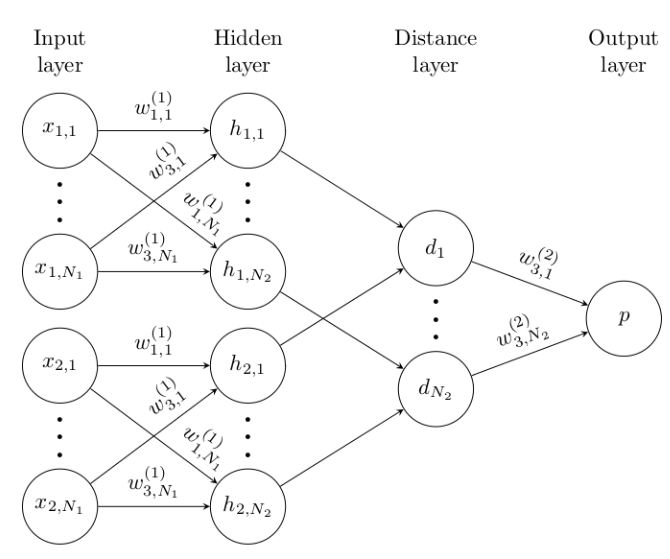

In [10]:
from IPython.display import Image
Image("images/neural_netwrok_architecture_cnn_Siamese_networks.png", width=600, height=600)

### Showing the Siamese networks Layer architecture

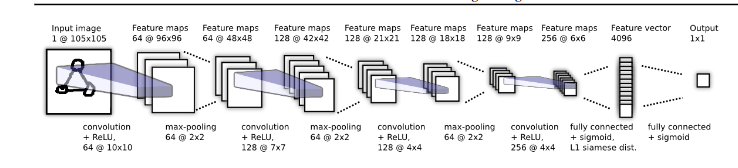

In [11]:
from IPython.display import Image
Image("images/layer_architecture.png", width=600, height=600)

### Importing tensorflow components
##### tensorflow functional apis are much more flexible when it comes to building more hardcore deep learning models

### ```from tensorflow.keras.models import Model```
##### this is the most important layer that we are gonna need. So when you are defining the model using functional api using model you are gonna pass in ``` Model(inputs = , outputs = ) ```. Here we are gonna pass the inputs and the outputs. It allows us to build more sophisticated neural network.
##### input = [input_image, verification_image], outputs = [1, 0] That's how this model class is used.
### ``` from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten ```
#### Layer class : 
##### This allows us to define a custom layer in our neural network. 
##### How do we generate a custom layer using this Layer class
##### syntax : class L1Distance(Layer) --> This effectively allows us to create a custom neural network layer via inheritance.
#### Conv2D : 
##### This allows us to do convolutions.
#### Dense
##### This gives us fully connected layer.
#### MaxPooling2D
##### This allows us to pool all of our layers in our neural network and effectively shrinks the information that we've actually got.
#### Input
##### It allows us to define what we are passing through to our model.
##### syntax : input(shape = )
#### Flatten
##### It takes all the information from the previous layer and flattens it down to a single dimension. this allows us to pass the information from a convolution layer to the dense layer.

In [12]:
# importing model components
# importing deep learning layers
# import tensorflow functional api
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

### Importing Data pre-processing standard dependencies and computer vision dependencies

##### ```import OS ``` will be used when we create our folder structures. we are going to use this to abstract our operating system from our python code. This just helps 
##### ```import random``` random helps during testing and generating our model and data 
##### how to see information about libraries that you have just imported ``` plt.imshow?? ```

In [13]:
import cv2 # importing open cv into our notebook
import os # This an os library 
import random 
import numpy as np
from matplotlib import pyplot as plt

# 2. Setup GPU growth
##### Here we are limiting how much vram tensorflow can use on the gpu. Because by default Tensoflow will expand to take it all the gpu vram that's available and this can cause some serious problems. and you will face out of memory errors.
##### avoid out of memory errors on the gpu by setting up the memory consumtion growth.
```python
gpus = tf.config.experimental.list_physical_devices('GPU')
```
##### accesing all of the different gpus that are present in my workstation
```python
for gpu in gpus : 
```
##### looping through all of the gpus
```python
tf.config.experimental.set_memory_growth(gpu,True)
```
##### This is used to set our memory growth

In [14]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus : 
    tf.config.experimental.set_memory_growth(gpu,True)

2023-12-05 16:41:18.374011: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2023-12-05 16:41:18.409835: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-05 16:41:18.409939: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 computeCapability: 8.6
coreClock: 1.777GHz coreCount: 28 deviceMemorySize: 11.76GiB deviceMemoryBandwidth: 335.32GiB/s
2023-12-05 16:41:18.410305: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-12-05 16:41:18.411673: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-12-05 16:41:18.412791: I tensorflow/stream_executor/pl

# 3. Create Our folder structure
### anchor folder
##### when we are going to perform our facial verification we are gonna pass two images, we are gonna pass an image called anchor and a verification image (positive or negative image)
##### anchor folder contains an input image for exmample images coming from webcam, smartphone camera etc...
### positive folder
##### we are gonna make sure that the images in this when compared to anchor gives us same i.e 1
### negative folder
##### we are gonna make sure that the images in this when compared to anchor gives us same i.e 0
#### we want the model to return 1 when it compares the images in anchor folder to positive folder images and 0 when we pare the anchor and negative folder images. because we want the model to differentiate ourseleves form other objects when we pass the images in the anchor folder via webcam.

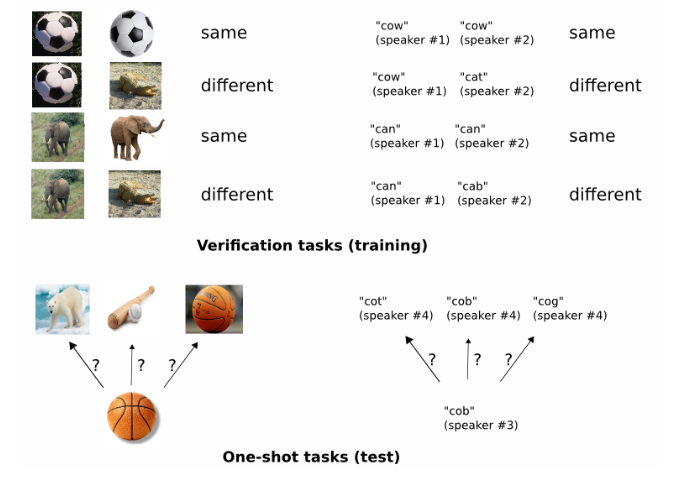

In [15]:
from IPython.display import Image
Image("images/working.png", width=600, height=600)

### setting up paths
```python
Positive_folder_path = os.path.join('data', 'positive')
```
#####  will return a path that we are about to create in our local workstation file system
##### So how do we create the paths for our data -->
##### First create an outer folder in your project directory with the name "data" and then create 3 folders inside of it with the name "positive", "negative" and  "anchor" respectively.

In [16]:
Positive_folder_path = os.path.join('data', 'positive') #positive verification images path
Negative_folder_path = os.path.join('data', 'negative') #negative verification images path
Anchor_folder_path = os.path.join('data', 'anchor') #anchor images path
#example of what the os.path.join('data', 'positive') will return when we print it.
#it only returns the path to our data
Positive_folder_path

'data/positive'

##### Creating the directories using os module of python programing language

In [15]:
# Commenting the code below to create our data folders because once executed 
# the folders would have been already created.
os.makedirs(Positive_folder_path)
os.makedirs(Negative_folder_path)
os.makedirs(Anchor_folder_path)

# 4. Getting our data
### Negative images : 
##### In order to collect our negative images we are gonna be levreging a standard image repository called "called labled faces in the wild". We need to download it and then unpack it and then get it to the structure that we need for our model.
### anchor and positive images : 
##### In this particular case we are gonna be using open cv to do that by using a web cam.

### Explaination : How are we gonna be using this dataset : 
##### We are gonna have positive examples , negative examples and our anchor examples.
##### Let's visualize as to how this is actually gonna work.

### collect the negative dataset from "labled faces in the wild dataset"

In [ ]:
# you can get this dataset through this link below
# http://vis-www.cs.umass.edu/lfw/

##### Go to the download section once you have opened the website for "labled faces in the wild" dataset and then select the link that says "All images as gzipped tar file"
##### uncompress the tar file using this command you so desire 
```python
!tar -xf file_name.tgz
```

##### Here we are gonna write a python script to take all the photos in different folders inside "labled faces in the wild" folder and put it inside the negative folder. Now one thing to note is that this particular python code will only follow the folder structure for this particular project, if you want to use this code somewhere else then you need to modify the code according to your project requirements.

In [18]:
# This for_loop loops through lfw folder's sub folders
# Do not re execute this cell because the images have already been copied
for directory in os.listdir('lfw'): 
    # This for_loop loops through all the images present inside the lfw sub folders
    # os.path.join joins the directory names and in return it gives us the full path
    for file in os.listdir(os.path.join('lfw', directory)):
        # define the existing path 'lfw' = root directory, directory = sub_folders, file = file_name
        EX_path = os.path.join('lfw', directory, file)
        # specifying the new path name
        # Negative_folder_path = os.path.join('data', 'negative')
        # file = file_name
        NEW_PATH = os.path.join(Negative_folder_path, file)
        # os.replace(existing_path, new_path)
        # this will move our files from the sub_folders of lfw folder into the negative folder
        os.replace(EX_path,NEW_PATH)

### collect our positive and anchor classes images from webcam
##### We are gonna use openCV to access our web cam and we are gonna collect those images and save them inside our positive folder. 
##### The size of our images that we are gonna be collecting is 250px by 250px. So by default the our image resolution might vary depending on our web cam. the reason why we are doing this is because the images inside our "labled faces in the wild" folder have 250px by 250px image size. So to make data processing a whole lot easier when it comes to training the modle we are gonna use webcam to collect images 250px by 250px images for our anchor and our positives.

### ensure that we can access our webcam 
##### Here we are gonna test that we have access to our webcam and we are also gonna make sure that we are getting the images of correct shape from our webcam

#### You may run into issues saying that waitkey module is not present in cv2 or something along those lines 
##### --> Solution : Try cv2.waitKey in place of cv2.waitkey. Capitalization counts. for more info visit this stackoverflow post : https://stackoverflow.com/questions/21568477/python-opencv-cv2-waitkey-error
#### Another error that you may run into is 
```
[ WARN:0] global /io/opencv/modules/videoio/src/cap_v4l.cpp (887) open VIDEOIO(V4L2:/dev/video1): can't open camera by index
```
##### OR
```
error: OpenCV(4.5.3) rror: (-215: Assertion failed) !_src.empty() in function 'cv:lcvtColor' C:\Users\runneradmin\AppData\Local
```
##### This error !src.empty() in function 'cv:lcvtColor' basically means that open cv is not able to access the webcam i.e whatever we are getting from the camera wheather it's a webcam or our phone camera is empty. which means that we don't have the right webcam number in " cap = cv2.VideoCapture(cameranumber) ".
##### --> Solution : cap = cv2.VideoCapture(-1) try changing index into  (0 ~ -1). For more info visit this stackoverflow post here in the link https://stackoverflow.com/questions/59371075/opencv-error-cant-open-camera-through-video-capture

In [17]:
# making connection to the webcam
cap = cv2.VideoCapture(-1)
# this while loop is gonna loop through every single frame that's sent by our webcam
while cap.isOpened():
    # cap.read is used to read the captured frame at that point in time
    # then we unpack the results that we get from read function
    # we get a return value and the actual frame 
    # the actual frame is stored in the frame variable --> This is the actual image frame
    # the return value is stored in the rat variable
    rat, frame = cap.read()
    # rendering the image that we got from the webcam back to the screen
    # imshow('name_of_the_image_frame', actual frame that came from the webcam)
    cv2.imshow('Web cam testing', frame)
    # inside the if block we will break the loop when we press the key 'q' on our keyboard
    # cv2.waitKey(1) --> This function waits for a key press infinitely
    # & 0XFF == ord('q') checking if the key press was 'q' or not
    # we are gonna configure this setting in a way that when we press 'a' it collect's anchor
    # when we press 'p' it collects positive images 
    if cv2.waitKey(1) & 0XFF == ord('q'):
        # this will break the loop and move the control out of the while loop block
        break
# cap.release is gonna release our webcam
cap.release()
# cv2.destroyAllWindows() will destroy all the opened opencv windows
cv2.destroyAllWindows()

##### The video frames that we are getting now is not in the form of 250px by 250px
##### To prove my point let's look at the last captured frame by opencv and see what are the dimensionality of those captured frames are

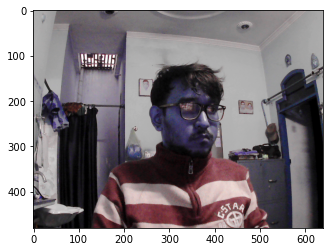

In [18]:
plt.imshow(frame)

##### As you can see that the images that we are getting have the shape 480px by 640px across 3 channels
##### But our requirements is that we need images that are 250px by 250px across 3 channels
##### What are these 3 channels ? They are effectively color channels of opencv

In [19]:
frame.shape

(480, 640, 3)

### Indexing OR Array Slicing
##### So in order to get the desired shape we have to do indexing or slicing 
```python
frame[:250,:250,:].shape
```
##### select the first 250 from first column, and then select first 250 from second column, and then select everything from the third column
##### explaining why " :250 " is written inside the squared bracket " start_from : end_at ". since we din't pass anything as to where to start from it's going to start slicing from index 0th pixel from the original image

In [20]:
frame[:250,:250,:].shape

(250, 250, 3)

### No let's check how our image is looking after we performed array slicing on them to bring those images to their right shape

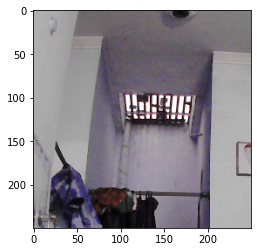

In [21]:
plt.imshow(frame[:250,:250,:])

##### As you can see after we performed arraySlicing the image that we got is actually got selected from the top left corner from the original image.
##### Now the problem is that It's not actually accurately capturing my face 
```python
plt.imshow(frame[120:120+250,200:200+250,:]) 
```
##### This solution here solves the problem that we were facing earlier
### NOTE : 
##### the solution 
```python
plt.imshow(frame[120:120+250,200:200+250,:])
```
##### will only work if you remain at the center of the screen while capturing the images using opencv via webcam also you might need to change the formula depending on your camera resolution.
### Explaination
```python
plt.imshow(frame[120:120+250,200:200+250,:]) 
```  
##### for first column 120(starting pixel) : 120+250(ending pixel), for second column 200(starting pixel) : 200+250(ending pixel), for third column :  (since we are passing nothing it's gonna select everything i.e all thre color channels)

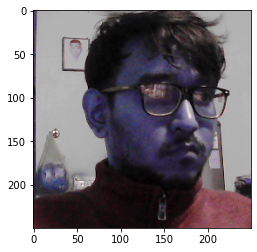

In [22]:
plt.imshow(frame[120:120+250,200:200+250,:])

#### Now that we have tested our web cam is working we can move ahead and collect our anchor and positive images through webcam using opencv
##### So inorder to save the images into their respective folders when we press a or p we need a uuid library
##### uuid library allows us to create images with a unique name

In [82]:
import uuid
cap = cv2.VideoCapture(-1)
while cap.isOpened():
    rat, frame = cap.read()
    # cut down frame 250px by 250px and selecting the center portion of the original image
    frame = frame[120:120+250,200:200+250,:] #explained this code above
    
    # Collect anchor images 
    if cv2.waitKey(1) & 0XFF == ord('a'):
        # uuid.uuid1() creating the unique image name using uuid library
        # '{}.jpg' specifying type of image file 
        # Anchor_folder_path = the directory that you want to save these images
        imagename1 = os.path.join(Anchor_folder_path, '{}.jpg'.format(uuid.uuid1()))
        # using cv2.imwrite() to actually write the images
        cv2.imwrite(imagename1,frame)
        
    # Collect positive images
    if cv2.waitKey(1) & 0XFF == ord('p'):
        # uuid.uuid1() creating the unique image name using uuid library
        # '{}.jpg' specifying type of image file 
        # Anchor_folder_path = the directory that you want to save these images
        imagename2 = os.path.join(Positive_folder_path, '{}.jpg'.format(uuid.uuid1()))
        # using cv2.imwrite() to actually write the images
        cv2.imwrite(imagename2,frame)
        
    cv2.imshow('Image Collection', frame)
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

##### uuid.uuid1() creating the unique image name using uuid library
##### '{}.jpg' specifying type of image file 

In [31]:
import uuid
'{}.jpg'.format(uuid.uuid1())

'44947aa4-9361-11ee-bffc-8d29bc2fa17a.jpg'

##### This gives us the directory where you want to store the images with the unique name

In [32]:
import uuid
os.path.join(Anchor_folder_path, '{}.jpg'.format(uuid.uuid1()))

'data/anchor/45fe2890-9361-11ee-bffc-8d29bc2fa17a.jpg'

# Explaination of how our model is working under the hood
##### a quick correction in the note below I have mistakely written <del>"labled faces in the world"</del> 
##### it should be "labled faces in the wild" 

In [33]:
class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)
PDF('explaination_working_of_siamese_model.pdf',size=(800,700))

 # 5. Load and Pre-process data

##### Tensorflow dataloader --> please check this link for more info " https://www.tensorflow.org/guide/data ". This tensorflow data loader allows us to build the data pipelines. building data pipelines makes building deeplearning models a whole lot easier.

### Get image directories
```python
tf.data.Dataset.list_files(Anchor_folder_path+'\*.jpg').take(300)
```
##### EXPLAINATION : This will go inside the specific directory and grab all the images inside of it since we passed an " * " asterisk inside the just before .jpg
##### ```tf.data.Dataset.list_files``` this is using a generator to be able to go in and grab all the files from that particular directory from our file system. 
### NOTE : 
##### Those who are working on Linux the code 
```python
negative =  tf.data.Dataset.list_files(Anchor_folder_path+'\*.jpg').take(300)
``` 
##### won't work because in windows file system backslash is used and in Linux file system forward slash is used so you need to change the code into something like this 
```python
negative = tf.data.Dataset.list_files(Negative_folder_path+'/*.jpg').take(300) 
```
### NOTE : 
##### There is another thing that you might want to keep note of is to make sure that you have equal number of samples in each of your classes or folders here in this case it's anchor, positive and negative folders inside our data folder which is our root folder for our dataset
```python
.take(300)
```
##### This will select 300 images from our directory

In [40]:
anchor = tf.data.Dataset.list_files(Anchor_folder_path+'/*.jpg').take(300)
positive = tf.data.Dataset.list_files(Positive_folder_path+'/*.jpg').take(300)
negative = tf.data.Dataset.list_files(Negative_folder_path+'/*.jpg').take(300)

#### Testing our grabed data from the directory
##### So here you can clearly see that ```tf.data.Dataset.list_files``` creates a set or a piepline of all the different files within a specific directory
##### One of the advantages of using ```tf.data.Dataset.list_files``` is that when we batch our data togeather, the way our model is gonna train is  to train our model on a batch at a time.
#### Things yet to be done**
##### 1. We will grab one batch out of this dataset (Which we will eventually create)
##### 2. We will do a Forward pass
##### 3. We will calculate the loss
##### 4. We will calculate the gradients (Gradient descent by differential calculus)
##### 5. We will calculate the updated gradients
##### 6. We will apply the updated gradients to all of the weights that are present in our neural network model
### this data pipeline allows you to do that all of that with a little bit of flexibility

In [41]:
dir_test = anchor.as_numpy_iterator()

In [57]:
dir_test.next()

b'data/anchor/b6771e28-935d-11ee-92eb-6d16dcb1c272.jpg'

### Pre-Processing : Scale and Re-size
##### Here we are gonna create our preprocessing pipelines
#### Here write our preprocessing function 
#### Functionality of our preprocessing function : -->
##### 1. Loads our image from our directory
##### 2. Resize our image
##### 3. Perform some scaling : convert all of those images values from (0 to 255) --> (0 to 1) This helps our neural network to optimize a lot easier. This effectively helps our gradient descent a little bit easier. It helps us achieve a better performing model.

### Some code explaination : 
```python
img = tf.image.resize(img,(100,100)) # resize the images
```
##### Resizing the image to be 100px by 100px by 3 channels (3 channels = rgb). The reason why we are doing this is because in the research paper as you can see down below in the diagram where they show input image It's clearly mentioned the dimensions of the images must be 105px by 105px but just to be on the safer side I have chosen the input images dimensionality to be 100px by 100px 

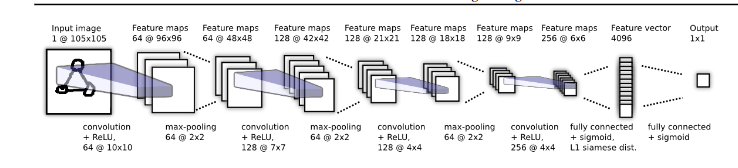

In [76]:
from IPython.display import Image
Image("images/layer_architecture.png", width=600, height=600)

In [77]:
def preprocess(file_path):
    # read the image from file_path that we pass in as an argument to this function
    # This is going to read our images or files like a bytes like object
    byte_img = tf.io.read_file(file_path) # read the images
    # load in the image
    img = tf.io.decode_jpeg(byte_img) # decode the images
    
    # preprocessing steps
    # Resizing the image to be 100px by 100px by 3 channels (3 channels = rgb)
    img = tf.image.resize(img,(100,100)) # resize the images
    # scaling images
    '''
    The normalization of an image consists in dividing each of its pixel values by the maximum 
    value that a pixel can take (255 for an 8-bit image, 4095 for a 12-bit image, 65 535 for a 
    16-bit image)
    '''
    img = img / 255.0 # divide the images by 255 (performing scaling)
    return img

##### Here you can see that our preprocess function is returning a numpy array of our image whose values are between 1 and 0, If we pass the image path inside our preprocess function

In [78]:
img = preprocess(dir_test.next())
img

<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
array([[[0.3272059 , 0.3247549 , 0.31666666],
        [0.3767157 , 0.32941177, 0.35857844],
        [0.6933824 , 0.6757353 , 0.6862745 ],
        ...,
        [0.6894608 , 0.6894608 , 0.6894608 ],
        [0.6901961 , 0.6901961 , 0.6901961 ],
        [0.69215685, 0.69215685, 0.69215685]],

       [[0.3497549 , 0.3242647 , 0.32230392],
        [0.4117647 , 0.34460783, 0.37720588],
        [0.6992647 , 0.67132354, 0.68602943],
        ...,
        [0.69191176, 0.69191176, 0.69191176],
        [0.69411767, 0.69411767, 0.69411767],
        [0.69509804, 0.69509804, 0.69509804]],

       [[0.3855392 , 0.31862745, 0.3230392 ],
        [0.4227941 , 0.3480392 , 0.3781863 ],
        [0.6982843 , 0.6855392 , 0.7019608 ],
        ...,
        [0.6963235 , 0.6963235 , 0.6963235 ],
        [0.69411767, 0.69411767, 0.69411767],
        [0.7       , 0.7       , 0.7       ]],

       ...,

       [[0.16053921, 0.1625    , 0.38333333],
        [0.16

##### Just to verify if we actually have the values in the above numpy array that we got after preprocessing an image

In [79]:
img.numpy().min() # returns the minimum value inside a numpy array

0.0

In [80]:
img.numpy().max() # returns the maximum value inside a numpy array

0.91887254

##### As you can see our preprocess function have effectively resized the images in 80 by 80 pixel format

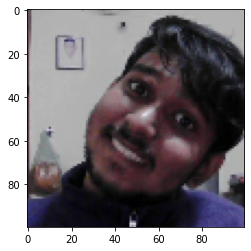

In [81]:
plt.imshow(img)

In [ ]:
dataset.map(preprocess)

### Create Labelled Dataset
##### Here we are gonna asociate our positive and our negative classes with our images

#### Explaination
##### our input images (anchor, positive) => should output 1 (a numpy array made up of 1's) OR (anchor, negative) => should output 0 (a numpy array made up of 0's). This output that we are getting in form of numpy array is what is gonna make up our labled dataset.

### errors you might encounter : 
```
object of type 'TakeDataset' has no len()
```
##### To solve this error you just need to replace this line of code 
```python
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
```
##### to this line of code
```python
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(list(anchor))))))
```
##### For more information go to this link https://stackoverflow.com/questions/59962329/typeerror-object-of-type-imagedatagenerator-has-no-len

### explaination of code : 
#### ```.zip``` allows us to iterate through all three at the same time when I say all three I mean these three  ``` (anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(list(anchor)) ```
##### anchor = ``` tf.data.Dataset.list_files(Anchor_folder_path+'/*.jpg').take(300) ``` --> our anchor images file path
##### positive = ``` tf.data.Dataset.list_files(Positive_folder_path+'/*.jpg').take(300) ``` --> our positive images file path
##### negative = ``` tf.data.Dataset.list_files(Negative_folder_path+'/*.jpg').take(300) ``` --> our negative image file path

```python
tf.ones(len(list(anchor))
```
##### It returns a numpy array of ones . 
##### So it is effectively creating our labled positives.
##### So in other words if we pass anchor and positive images at the same time then it should effectively represent a 1 which is represented here by a numpy array of ones

In [108]:
tf.ones(len(list(anchor)))

<tf.Tensor: shape=(300,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

```python
tf.zeros(len(list(anchor)))
```
##### It returns a numpy array of zeros 
##### So it is effectively creating our labled negatives
##### So in other words if we pass anchor and negative images at the same time then it should effectively represent a 0 which is represented here by a numpy array of zeros

In [109]:
tf.zeros(len(list(anchor)))

<tf.Tensor: shape=(300,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

##### ```tf.data.Dataset.from_tensor_slices``` is puting our data inside the dataloader

In [131]:
class_labels = tf.data.Dataset.from_tensor_slices(tf.zeros(len(list(anchor))))

In [136]:
#convert class_labels into an iterator
iterator_labels = iter(class_labels)

#### errors you might encounter : 
``` TensorSliceDataset' object has no attribute 'next' ```
#####  In TensorFlow 2.x, you can use the iter() function to create an iterator from a tf.data.Dataset and then use the next() function to get the next element. However, it's important to note that using next() directly might not work well with eager execution.

##### Here's an example of how you can use an iterator with TensorFlow 2.x:
```python
import tensorflow as tf

# Assuming class_labels is a TensorSliceDataset
class_labels = tf.data.Dataset.from_tensor_slices(tf.zeros(len(list(anchor))))

# Create an iterator from the dataset
iterator = iter(class_labels)

# Get the next element
next_element = next(iterator)

# Now you can use next_element in your code
print(next_element)

```

In [143]:
next_element = next(iterator_labels)
next_element

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [104]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(list(anchor))))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(list(anchor))))))
data = positives.concatenate(negatives) 

```python
positives.concatenate(negatives)
```
##### It is concatenating the positives dataset and the negatives dataset

In [145]:
samples = data.as_numpy_iterator()

##### As you can see we have finally got our 
```
(b'data/anchor/1c69c1cc-935e-11ee-92eb-6d16dcb1c272.jpg',
 b'data/positive/788dc41a-9360-11ee-bffc-8d29bc2fa17a.jpg',
 1.0)
 ```
 #####  (b'anchor_image_file_path', b'positive_image_file_path', label_which_is_1_or_0)

In [146]:
samples.next()

(b'data/anchor/1c69c1cc-935e-11ee-92eb-6d16dcb1c272.jpg',
 b'data/positive/788dc41a-9360-11ee-bffc-8d29bc2fa17a.jpg',
 1.0)

##### So now here what we have got is a one bit dataset named " data "
```
<ConcatenateDataset shapes: ((), (), ()), types: (tf.string, tf.string, tf.float32)>
```
##### shapes: ((anchor_images), (positive_images_paths or negative_images_paths), (numpy_array_of_ones or numpy_array_of_zeros))

In [105]:
data

<ConcatenateDataset shapes: ((), (), ()), types: (tf.string, tf.string, tf.float32)>

### Build Train and Test partition

##### Here we need to write a function which processes a twin

## start video from here : 
##### https://youtu.be/LKispFFQ5GU?list=PLAHgAk2ZrQwgmvoqMaCFiUJt6x7MCP6_d&t=5583